# Product Exploration w.r.t Popularity

#### In this project, we will explore the most popular product from the market

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from os import path

In [14]:
trans=pd.read_csv('C:\\Users\\imnab\\Downloads\\OVO_DS-ecommerce-brazilian\\product_category_name_translation.csv')
order=pd.read_csv('C:\\Users\\imnab\\Downloads\\OVO_DS-ecommerce-brazilian\\olist_public_dataset_v2.csv')
cust=pd.read_csv('C:\\Users\\imnab\\Downloads\\OVO_DS-ecommerce-brazilian\\olist_public_dataset_v2_customers.csv')

### Data_Preprocessing

In [15]:
trans.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [16]:
trans.shape

(71, 2)

In [17]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#### I would like to translate the product category from portugese to english. So, I will join the order and trans dataset based on product category name.

In [18]:
order_trans = pd.merge(trans,
                       order,
                       how='right',
                       on=['product_category_name', 'product_category_name'])
order_en = order_trans.drop(['product_category_name'], axis=1)

#### We can see below is the joined dataset, with english translation for product category.

In [19]:
order_en.head()

,product_category_name_english,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,health_beauty,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,health_beauty,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36.000000,2018-04-18 13:31:35.349522,2018-05-10 00:00:00.000000,...,51,405,2,190d9562bfbe9d3ed876c2ac6f2f5894,e98077a0d199a25a40eab3b14cc230d4,5,NaN,NaN,2018-04-28 00:00:00.000000,2018-04-29 21:07:53+00:00
2,health_beauty,8a723730400b508cbf47fbef4a76ec8e,delivered,60.00,20.91,1,1,2018-02-18 12:41:01.000000,2018-02-18 13:46:36.606696,2018-03-14 00:00:00.000000,...,38,1665,1,5858f45c20fde7d7e49af37a2166635a,8a723730400b508cbf47fbef4a76ec8e,5,NaN,muito bom cabelo fica lisinho,2018-03-04 00:00:00.000000,2018-03-07 02:53:50+00:00
3,health_beauty,cf71b9b6b7ed12d72f541b0420023f19,delivered,79.99,10.94,1,1,2018-05-09 23:33:28.000000,2018-05-11 02:57:52.916830,2018-05-24 00:00:00.000000,...,59,492,3,2b4609f8948be18874494203496bc318,cf71b9b6b7ed12d72f541b0420023f19,4,Bom,gostei,2018-05-18 00:00:00.000000,2018-05-20 19:47:57+00:00
4,health_beauty,93ef9253c47e7dfc633c01f728488cb1,delivered,58.99,11.73,1,1,2017-10-26 09:07:04.000000,2017-10-27 09:15:12.032978,2017-11-09 00:00:00.000000,...,59,492,2,7c1bd920dbdf22470b68bde975dd3ccf,93ef9253c47e7dfc633c01f728488cb1,4,NaN,NaN,2017-11-01 00:00:00.000000,2017-11-03 20:37:36+00:00


#### The following bar chart shows percentage of each rating for overall products.

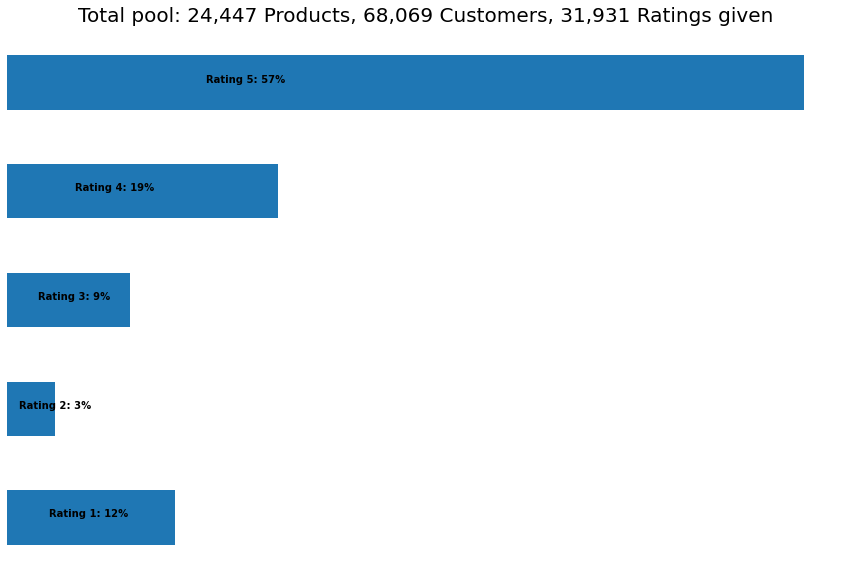

In [20]:
n = order_en.groupby('review_score')['review_score'].agg(['count'])

prod_count = order_en['product_id'].nunique()

cust_count = cust['customer_unique_id'].nunique() - prod_count

rating_count = order_en['review_score'].count() - cust_count

ax = n.plot(kind='barh', legend=False, figsize=(15, 10))
plt.title(
    'Total pool: {:,} Products, {:,} Customers, {:,} Ratings given'.format(
        prod_count, cust_count, rating_count),
    fontsize=20)
plt.axis('off')

for i in range(1, 6):
    ax.text(n.iloc[i - 1][0] / 4,
            i - 1,
            'Rating {}: {:.0f}%'.format(i,
                                        n.iloc[i - 1][0] * 100 / n.sum()[0]),
            color='black',
            weight='bold')

#### As we can see, it is actually excellent to have 57% of the products is rated 5. However, the rate 1: 12% percentage is quite high compared to rate 2 and 3

#### We'll take a look at the most popular product category, and we'll measure it by how many reviews has been submitted at each product category

In [21]:
pop_prod = pd.DataFrame(
    order_en.groupby('product_id')['review_score'].count())
most_popular = pop_prod.sort_values('review_score', ascending=False)
most_popular.head(10)

,review_score
product_id,
99a4788cb24856965c36a24e339b6058,653
aca2eb7d00ea1a7b8ebd4e68314663af,615
422879e10f46682990de24d770e7f83d,475
d1c427060a0f73f6b889a5c7c61f2ac4,449
389d119b48cf3043d311335e499d9c6b,435
53759a2ecddad2bb87a079a1f1519f73,432
53b36df67ebb7c41585e8d54d6772e08,427
368c6c730842d78016ad823897a372db,380
2b4609f8948be18874494203496bc318,368


#### It would be easier if we show it in the bar chart, as shown below.

<AxesSubplot:ylabel='product_id'>

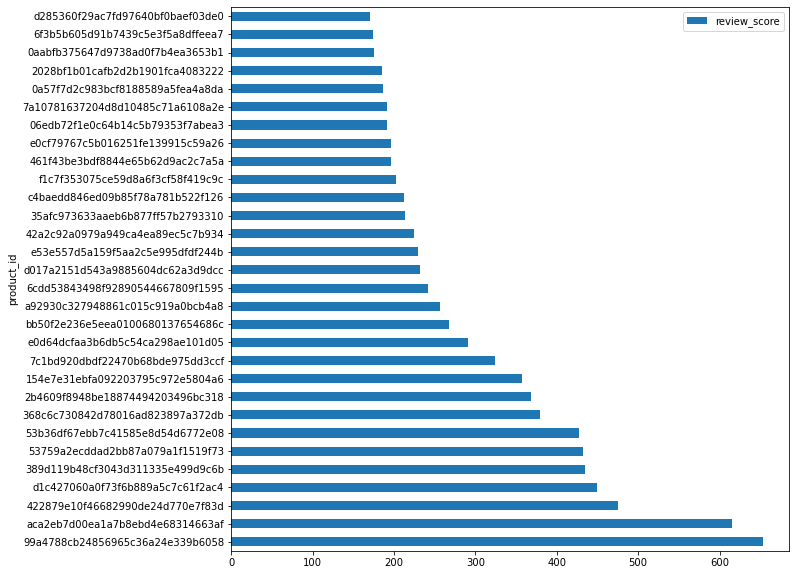

In [22]:
plt.rcParams['figure.figsize'] = (10, 10)
most_popular.head(30).plot(kind="barh")

#### From the bar chart above, we can conclude that product with product id: '99a4788cb24856965c36a24e339b6058' is the most popular. This product has highest review score, this score may be different for each person (might be high or low). However, we only focus on how many people reviewing this product since the score indicate the popularity.

# CONCLUSION

#### We can conclude from this analysis that product id: '99a4788cb24856965c36a24e339b6058' is the most popular product. I recommend for the company to:

#### 1) Not promote this popular product frequently since it is already popular
#### 2) Promote another product with low score of rating to attract customer with the product.